In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston=load_boston()

In [2]:
ds=pd.DataFrame(boston.data,columns=boston.feature_names)
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#1-hot encoding of RAD variable; because its categorical variable
#representing it as categorical variable
ds["RAD"]=ds["RAD"].astype("category")
#datatype of the ds
ds.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS        float64
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

In [4]:
#now using df.get_dummies(); it will drop the original column also
#this method will automatically pick the categorical variable and apply 1-hot encoding
ds=pd.get_dummies(ds,prefix="RAD")
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,...,4.98,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,...,9.14,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,...,4.03,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,...,2.94,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,...,5.33,0,0,1,0,0,0,0,0,0


In [5]:
#now doing Scaling on AGE,TAX,B or on entire Dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler();
scaler=scaler.fit(ds)
scaledData=scaler.transform(ds)

In [7]:
#now create the scaled dataframe from it
dss=pd.DataFrame(scaledData,columns=ds.columns)

In [8]:
#now perform the clusetring 
#step 1  cluster configuration to kind the k
#step 2 using the value of 'k', generate the cluster

#now to know the best value of 'k' 
# wss/bss vs k

#That is when k=2, wss=sum of all point with theri 2 centeroid individually 
#        i.e within clusterdistance ( this is inertia )
#    and   bwss means distance between centroid c1 and c2

#now when k=3, wss= sum of distance all point of culter and their centroid 
# the above wss is given by inertia of the cluster configuration
## but for bwss the sum of distance between 3 centroid.
## c1 to c2, c1 to c3 and c2 to c3

###when cluster configuration=4
##the bss= dist(c1,c2)+dist(c1,c3) +dist(c1,c4) + dist(c2,c3) +dist(c2,c4) +dist(c3,c4)

#so all possible combination we need to find out for all values of k

In [9]:
from sklearn.cluster import KMeans
from itertools import combinations_with_replacement

from itertools import combinations 
from scipy.spatial import distance
print(list(combinations_with_replacement("ABCD", 2)))

[('A', 'A'), ('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'C'), ('C', 'D'), ('D', 'D')]


In [10]:
wss=[]
bss=[]
pairmap={}
dis=[]
d=0
distanceMap={}
for k in range(2,16):
    #perforiming  the cluster configuration
    clust=KMeans(n_clusters=k,random_state=0).fit(dss)
    wss.append(clust.inertia_)
    c=list(combinations(range(0,k), 2))
    print("Combinations ----------->",c)
    print("ClusterCenters Are Below----------->")
    dataFrameClusterCenter=pd.DataFrame(clust.cluster_centers_)
    print(pd.DataFrame(clust.cluster_centers_))
    print("The above are clusterCenters are for k==",k)
    pairmap[k]={"pairs":c}
    for i in c:
        #converting the tuple() to list using the list() method
        pair=list(i)
        print("pair is",pair)
        #extracting the index from the pair
        index1=pair[0]
        index2=pair[1]
        #print("row 1"); print(dataFrameClusterCenter.iloc[index1,:])
        #print("row 2"); print(dataFrameClusterCenter.iloc[index2,:])
        d=distance.euclidean(dataFrameClusterCenter.iloc[index1,:],
                             dataFrameClusterCenter.iloc[index2,:])
        print("distance",d)
        #appending the calculated distance between each pair of the cluster centers in a list
        dis.append(d)  
        distanceMap[k]={"distance":dis}
    #making the list empty for next k
    dis=[]
        
print("disstacne map for each k ")
print(distanceMap)   
print("wss for all k ")
print(wss)     

Combinations -----------> [(0, 1)]
ClusterCenters Are Below----------->
         0             1         2         3         4         5         6   \
0  0.004275  1.545699e-01  0.297533  0.072581  0.262615  0.540777  0.597142   
1  0.141233  2.359224e-16  0.651902  0.059701  0.589445  0.469377  0.896291   

         7         8         9   ...        11            12            13  \
0  0.299306  0.244552  0.556137  ...  0.241072  5.376344e-02  6.451613e-02   
1  0.084350  0.915404  0.808352  ...  0.468912 -2.081668e-17  6.245005e-17   

             14        15            16            17            18  \
0  1.021505e-01  0.290323  3.091398e-01  6.989247e-02  4.569892e-02   
1  1.665335e-16  0.014925  4.440892e-16 -9.020562e-17 -2.081668e-17   

             19            20  
0  6.451613e-02  4.440892e-16  
1  6.245005e-17  9.850746e-01  

[2 rows x 21 columns]
The above are clusterCenters are for k== 2
pair is [0, 1]
distance 1.4853545898144909
Combinations -----------> [(0, 1), (

In [12]:
#sum the distance of between every cluster 
#summedDistance storing to bss list
bss=[]
import math
for i in range(2,16):
    value=distanceMap.get(i)
    print(value)
    list=value['distance']
    print(math.fsum(list))
    summedDistance=math.fsum(list)
    bss.append(summedDistance)

{'distance': [1.4853545898144909]}
1.4853545898144909
{'distance': [1.6996373724449136, 1.1590279750599504, 1.5316437738255848]}
4.390309121330449
{'distance': [1.6996373724449136, 1.1428879805591765, 1.4543898301259581, 1.579225452094255, 1.6932250125998825, 1.119949854273375]}
8.68931550209756
{'distance': [1.8949550259319448, 1.4912913433186872, 1.114148064160133, 1.4616793581422391, 1.6996373724449136, 1.5604540859177554, 1.6932250125998825, 1.1439342810781519, 1.4543898301259581, 1.12643089610056]}
14.640145269820225
{'distance': [1.780799050391775, 1.6996373724449136, 1.6950032531182493, 1.6932250125998825, 1.6257112940858376, 1.349702902308367, 1.30963388795223, 1.3098764167417052, 0.9773308400483052, 1.4378140835907787, 1.4543898301259581, 1.1999845212021647, 1.4286755225227508, 1.1899553567967094, 1.1924416919816558]}
21.344181035911284
{'distance': [1.8949550259319448, 1.4616793581422391, 1.4912913433186872, 1.4418270410370222, 1.2540284793905516, 1.2564182385354443, 1.693225

[1.4853545898144909,
 4.390309121330449,
 8.68931550209756,
 14.640145269820225,
 21.344181035911284,
 30.50323614084517,
 40.938493615577556,
 54.613666446074525,
 69.50914558154972,
 84.94481389237373,
 105.27016800006763,
 126.87461801682389,
 146.09859340123774,
 171.02323925449934]

In [15]:
#1. now we have bss for all the k 
bss

[1.4853545898144909,
 4.390309121330449,
 8.68931550209756,
 14.640145269820225,
 21.344181035911284,
 30.50323614084517,
 40.938493615577556,
 54.613666446074525,
 69.50914558154972,
 84.94481389237373,
 105.27016800006763,
 126.87461801682389,
 146.09859340123774,
 171.02323925449934]

In [16]:
#2. now we have wss for all the k
wss

[517.2616705480712,
 410.3699136892756,
 330.996264997904,
 295.85591141655397,
 273.7581099405556,
 248.70235449877163,
 226.2070868294021,
 199.36155611284207,
 180.6090695800935,
 160.63192214393143,
 143.8155811015169,
 137.15878717370126,
 129.6019306570267,
 120.09096768224452]

In [17]:
#but wss shal be sqrt(wss[i])
len(wss)
len(bss)
sqrtwss=[]
for i in range(0,len(wss)):
    sqrt=math.sqrt(wss[i])
    print(sqrt)
    sqrtwss.append(sqrt)

22.743387402673136
20.2575890394014
18.19330275122975
17.20046253495975
16.545637187505218
15.770299759318833
15.040182406786233
14.119545180806712
13.439087378988704
12.674064941601468
11.992313417415211
11.7114809983068
11.384284371756825
10.958602451145152


In [18]:
#so this sqrtwss shall be used
sqrtwss

[22.743387402673136,
 20.2575890394014,
 18.19330275122975,
 17.20046253495975,
 16.545637187505218,
 15.770299759318833,
 15.040182406786233,
 14.119545180806712,
 13.439087378988704,
 12.674064941601468,
 11.992313417415211,
 11.7114809983068,
 11.384284371756825,
 10.958602451145152]

In [19]:
#final ratio =sqrtwss/bss
ratio=[]
for i in range(0,len(sqrtwss)):
    #ratio.append(sqrtwss[i]/wss[i])
    ratio.append(sqrtwss[i]/bss[i])
    
    #So finally perforimg scatter plot of ratio vs k plot

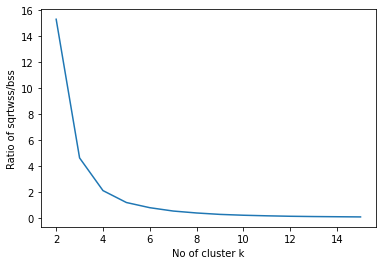

In [20]:
#########################   ratio=(sqrtwss/bss) vs k plot ############################
ratio
del list
k=range(2,16)
k
k=list(k)
k
from matplotlib import pyplot as plt
plt.plot(k,ratio)
plt.xlabel("No of cluster k")
plt.ylabel("Ratio of sqrtwss/bss")
plt.show()

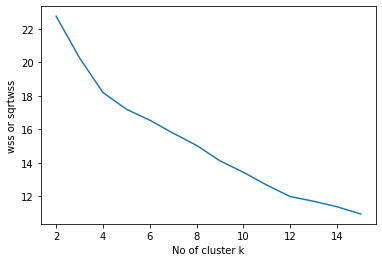

In [21]:
#plot of sqrtwss vs k
plt.plot(k,sqrtwss)
plt.xlabel("No of cluster k")
plt.ylabel("wss or sqrtwss")
plt.show()

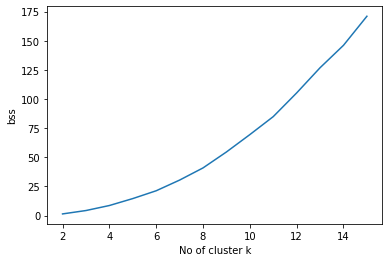

In [22]:
#plot of bss vs k
plt.plot(k,bss)
plt.xlabel("No of cluster k")
plt.ylabel("bss")
plt.show()

In [23]:
############# Now as we knoe the optiomal value of k is 4, so 
############# So we now perform actual clustering of 506 observations and there scaled 
############ scaled and linear independence dataset

#our scaled dataset is represented by dss
dss.shape

(506, 21)

In [24]:
#to find corelation matrix 
dss.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,...,0.455621,-0.084456,-0.091673,-0.116598,-0.197472,-0.184650,-0.093806,-0.075143,-0.084191,0.632302
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,...,-0.412995,0.248457,0.086702,0.061369,0.076190,-0.005934,0.016154,0.122776,-0.048974,-0.289750
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,...,0.603800,-0.179690,-0.049031,-0.279307,-0.030002,-0.108959,-0.099794,-0.166009,-0.169444,0.603593
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.035587,-0.121515,...,-0.053929,-0.015326,-0.060828,-0.018572,0.007389,0.056601,-0.063444,-0.050827,0.122381,-0.020051
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,...,0.590879,-0.160877,-0.134503,-0.251740,-0.229389,0.075839,-0.080115,-0.183122,-0.119886,0.604139
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,...,-0.613808,0.078383,0.116137,0.076479,-0.113768,0.083847,-0.059651,0.096459,0.211773,-0.222159
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,...,0.602339,-0.169885,-0.030186,-0.195206,-0.144934,0.012508,-0.069790,-0.188527,-0.009720,0.448516
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,...,-0.496996,0.215315,0.032031,0.183063,0.159835,-0.025191,0.025432,0.239385,0.065296,-0.489642
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,...,0.543993,-0.140710,-0.195576,-0.274436,-0.226179,-0.246066,-0.048868,-0.114976,-0.141791,0.909506
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,...,0.374044,-0.083528,-0.120079,-0.037827,0.165909,-0.478578,-0.068886,-0.004280,-0.049578,0.479177


In [25]:
#now performing the clustering
clust=KMeans(n_clusters=4,max_iter=500,random_state=0).fit(dss)

In [26]:
#now extract the clusterCenters
clusterCenter=clust.cluster_centers_

In [27]:
#convert clusterCenter to dataframe to do the cluster profilin
ccd=pd.DataFrame(clusterCenter,columns=dss.columns)

In [28]:
#ccd for cluster profilin
ccd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0.007660,1.110870e-01,0.340903,0.095652,0.382476,0.542663,0.683043,0.233496,0.276419,0.419889,...,0.246336,-4.857226e-17,-2.775558e-17,-1.387779e-17,0.000000e+00,1.000000e+00,-2.775558e-17,-2.081668e-17,-2.775558e-17,2.220446e-16
1,0.143340,2.220446e-16,0.646628,0.060606,0.591392,0.471575,0.895008,0.084720,0.914122,0.808511,...,0.465524,-2.775558e-17,5.551115e-17,1.526557e-16,7.216450e-16,4.440892e-16,-9.020562e-17,-2.081668e-17,5.551115e-17,1.000000e+00
2,0.001573,1.914094e-01,0.214765,0.053691,0.185405,0.571808,0.536305,0.346085,0.200740,0.561759,...,0.207772,1.342282e-01,1.610738e-01,2.550336e-01,3.330669e-16,3.053113e-16,1.744966e-01,1.140940e-01,1.610738e-01,3.330669e-16
3,0.004356,1.473182e-01,0.377076,0.072727,0.245496,0.492837,0.596723,0.300394,0.284316,0.695358,...,0.288882,-3.469447e-17,-2.081668e-17,0.000000e+00,1.000000e+00,1.942890e-16,-2.081668e-17,-2.081668e-17,-2.081668e-17,2.220446e-16


In [29]:
#so profiling details
#clusterId 1 is having the highest crime rate
# industry are more in clusterId 1   

In [30]:
#to see the labels i.e clusterId for each observation
labels=clust.labels_

In [31]:
#total labes;
len(labels)
clusterIds=list(labels)

In [32]:
#now perform the inverse Scaling
originalDataAsNumpy=scaler.inverse_transform(dss)
#converting numpy to dataset
originalDataset=pd.DataFrame(originalDataAsNumpy,columns=dss.columns)

In [33]:
#adding the labelled column to the originalDataset
originalDataset["Label"]=labels

In [34]:
#saving data on the system as OriginalData.csv
originalDataset.to_csv("yoursystem path\\originalData.csv")
#to see whether data contains the label or not
originalDataset.Label[0]

2

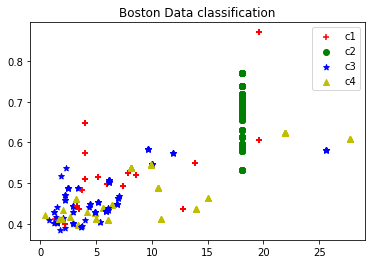

In [35]:
##### Now plotting the Classfication 
import pylab as pl
len=originalDataset.shape[0]
len
for i in range(0, len):
   if originalDataset.Label[i] == 0:
      c1 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='r', marker='+')
   elif originalDataset.Label[i]  == 1:
      c2 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='g',marker='o')
   elif originalDataset.Label[i]  == 2:
      c3 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='b',marker='*')
   elif originalDataset.Label[i] == 3:
      c4 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='y',marker='^')
pl.legend([c1, c2, c3,c4], ['c1','c2','c3','c4'])  
pl.title('Boston Data classification')
pl.show()